# Imports and preparation

In [1]:
import os

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from tqdm import tqdm

In [5]:
import time, gc

In [6]:
import importlib

In [7]:
from pathlib import Path

In [8]:
from util import util_elastic

OpenAI tiktoken module is not available for Python < 3.8,Linux ARM64 and AARCH64. Falling back to GPT2TokenizerFast.


In [9]:
from util import util_pipeline

In [10]:
# Para ter repetibilidade nos resultados
random_state = 1

# Tratar valores infinitos (+ e -) como np.NaN
pd.options.mode.use_inf_as_na = True

# IMPORTANTE para tornar figuras interativas
# %matplotlib notebook

# Tamanho padrão das figuras
figsize=(10,6)

pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)

pd.set_option('display.column_space', 40)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 200)


In [11]:
PATH_QUERY = '../data/juris_tcu/query.csv'
PATH_QREL =  '../data/juris_tcu/qrel.csv'

# Create reference to index (elastic search)

In [12]:
index_dict = util_elastic.return_indexes('indir', parm_print=True)

Index: indir_juris_tcu
{'health': 'yellow', 'status': 'open', 'index': 'indir_juris_tcu', 'uuid': 'OO2nZF_aRyWnrw-hDTwfbA', 'pri': '1', 'rep': '1', 'docs.count': '16045', 'docs.deleted': '6129', 'store.size': '338.2mb', 'pri.store.size': '338.2mb'}

Index: indir_juris_tcu_index
{'health': 'yellow', 'status': 'open', 'index': 'indir_juris_tcu_index', 'uuid': 'Pl89T40dSwORJnIuYF1t9A', 'pri': '1', 'rep': '1', 'docs.count': '13255', 'docs.deleted': '13255', 'store.size': '289.1mb', 'pri.store.size': '289.1mb'}



In [13]:
index_dict

{'indir_juris_tcu': {'health': 'yellow',
  'status': 'open',
  'index': 'indir_juris_tcu',
  'uuid': 'OO2nZF_aRyWnrw-hDTwfbA',
  'pri': '1',
  'rep': '1',
  'docs.count': '16045',
  'docs.deleted': '6129',
  'store.size': '338.2mb',
  'pri.store.size': '338.2mb'},
 'indir_juris_tcu_index': {'health': 'yellow',
  'status': 'open',
  'index': 'indir_juris_tcu_index',
  'uuid': 'Pl89T40dSwORJnIuYF1t9A',
  'pri': '1',
  'rep': '1',
  'docs.count': '13255',
  'docs.deleted': '13255',
  'store.size': '289.1mb',
  'pri.store.size': '289.1mb'}}

In [14]:
INDEX_NAME = 'indir_juris_tcu'

In [15]:
index = util_elastic.return_index(parm_index_name=INDEX_NAME)


Qtd de documentos 16045

Qtd de embeddings 16045

Documento.id=1: None


# Busca

In [16]:
# Test query
# parm_query = "trata-se de uma denúncia contra o prefeito de Manhuaçu por não haver pago os funcionários da área de limpeza urbana"
parm_query = "documentos local impróprio perda de informações responsabilização"

In [22]:
# se precisar reload
importlib.reload(util_pipeline)

<module 'util.util_pipeline' from '/home/borela/fontes/ind-ir/code/util/util_pipeline.py'>

In [17]:
%%time
pipe = util_pipeline.return_pipeline_bm25(index)

CPU times: user 596 µs, sys: 0 ns, total: 596 µs
Wall time: 593 µs


In [18]:
%%time
doctos_retornados = pipe.run(query=parm_query, 
 params={"Retriever": {"top_k": 300}})


CPU times: user 6.5 ms, sys: 0 ns, total: 6.5 ms
Wall time: 175 ms


In [19]:
doctos_retornados.keys()

dict_keys(['documents', 'root_node', 'params', 'query', 'node_id'])

In [20]:
doctos_retornados['documents'][0]

<Document: {'content': 'A transferência de documentos da entidade para local impróprio ao armazenamento, causando a perda de informações ou inviabilizando seu manuseio, de forma a impedir a atuação do TCU, é causa de responsabilização do gestor que a ordenou.', 'content_type': 'text', 'score': 0.9821323695658761, 'meta': {'area_name': 'Responsabilidade', 'num_tokens_monot5_3b': 69, 'normative_author_name': 'JOSÉ JORGE', 'normative_date': '2012-10-03', 'normative_author_type': 'RELATOR', 'normative_process_type': 'REPRESENTAÇÃO', 'num_word': 37, 'reference_list': 'Lei Ordinária 8.443/1992, art. 58, inciso II', 'paradigmatic': '', 'area_id_descriptor': 775, 'len_text_char_log': 5, 'num_tokens_minilm': 53, 'normative_identification': 'Acórdão 2669/2012 - Plenário', 'len_text_char': 235}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '34899'}>

In [27]:
util_pipeline.detail_document_found(doctos_retornados)

Parâmetros usados: {'Retriever': {'top_k': 300}}
Consulta: documentos local impróprio perda de informações responsabilização
Qtd documentos retornados: 300
Primeiro docto:
<Document: id=34899, content='A transferência de documentos da entidade para local impróprio ao armazenamento, causando a perda de...'>

Último (300):
<Document: id=18169, content='A Administração deve implantar controle da execução orçamentária, a fim de obter prontamente informa...'>
Seguem os nomes dos termos recuperados em ordem de score
0 : ['34899', 0.981963816033656]
1 : ['61421', 0.826691701018659]
2 : ['13144', 0.8027661902911283]
3 : ['26263', 0.7980645674009239]
4 : ['32649', 0.7906508235557026]
5 : ['32563', 0.7807724254084968]
6 : ['140073', 0.7796415759178017]
7 : ['58729', 0.7736531781492406]
8 : ['27996', 0.7714461243794927]
9 : ['23179', 0.7708551682502112]
10 : ['31298', 0.7701182228767582]
11 : ['32725', 0.7683082819721286]
12 : ['31559', 0.7665169136509812]
13 : ['32795', 0.7649085820417367]
14 : 

        pipe options
        util_pipeline.return_pipeline_sts_multihop(index)
        util_pipeline.return_pipeline_join(index)
        util_pipeline.return_pipeline_sts_multihop_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_join_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_bm25_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_bm25_reranker(index, 'MINILM', parm_limit_query_size=350)
        util_pipeline.return_pipeline_sts_reranker(index, 'MINILM', parm_limit_query_size=350)
        util_pipeline.return_pipeline_sts_reranker(index, 'MONOT5', parm_limit_query_size=350)

imprimir o pipe

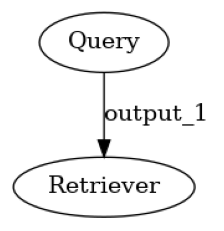

In [23]:
util_pipeline.print_pipe_image(pipe)

In [ ]:
# pipe.save_to_yaml(Path("pipe_join_ranker_monot5_3b.yahml"), return_defaults = True)
